In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
plt.rcParams['figure.figsize'] = (14,6)
import librosa, librosa.display



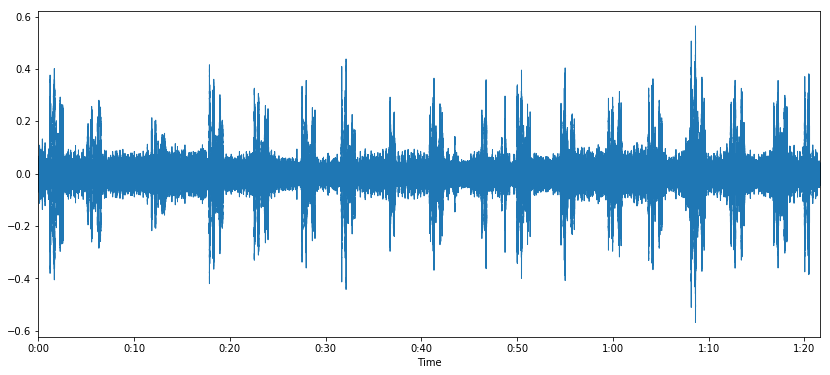

In [115]:

x, fs = librosa.load('dataset/subset/Carpodacus-erythrinus-374390.mp3')
# x, fs = librosa.load('Fringilla-coelebs-155277.mp3')
# x, fs = librosa.load('Fringilla-coelebs-143449.mp3')

librosa.display.waveplot(x, sr=fs)


In [112]:
import IPython.display as ipd
ipd.Audio(x, rate=fs)

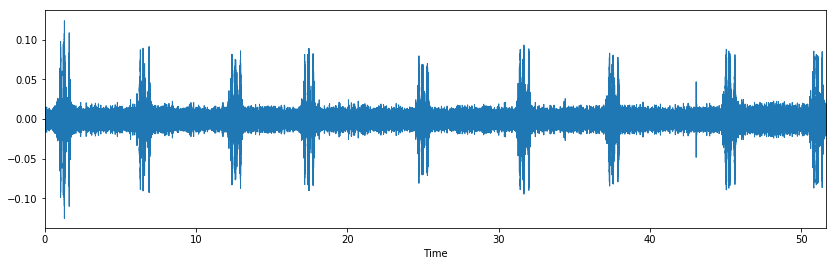

In [111]:
import numpy as np
# mfcc = librosa.feature.mfcc(x, sr=fs)
# mfcc = (mfcc - np.min(mfcc) ) / (np.max(mfcc) - np.min(mfcc))

stft = librosa.stft(x)

# stft[0:60,:] = 0
# stft[-300:,:] = 0

x_corr = librosa.istft(stft)
librosa.display.waveplot(x_corr, sr=fs)
ipd.Audio(x_corr, rate=fs)
# librosa.display.specshow(spec)
# librosa.display.specshow(mfcc)

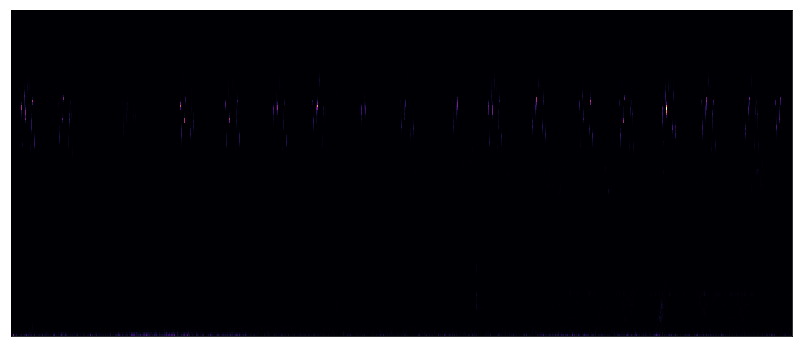

In [116]:
spec = librosa.feature.melspectrogram(x, sr=fs, n_mels=128)
# librosa.display.specshow(np.abs(stft))
# print(stft.shape)
# print(spec.shape)
# spec_mean = np.mean(spec, axis=1).reshape(-1,1)
# spec_mean[0:30] = 0
# librosa.display.specshow(spec_mean)
librosa.display.specshow(spec)

In [90]:
31 / 1352

0.022928994082840236

In [104]:
import pandas as pd
vs = pd.read_csv('melsums_norm.tsv',sep='\t',)
vs

Anas-platyrhynchos-294975  0.004590288498946472  \
0            Anas-platyrhynchos-285222          1.799818e-05   
1            Anas-platyrhynchos-467786          2.128651e-07   
2            Anas-platyrhynchos-357884          9.425524e-07   
3            Anas-platyrhynchos-110314          1.823306e-04   
4                 Corvus-cornix-461606          6.568590e-02   
5                 Corvus-cornix-380469          1.183469e-03   
6                 Corvus-cornix-437775          1.095870e-06   
7                 Corvus-cornix-110157          1.422752e-01   
8                 Corvus-cornix-167746          3.538993e-01   
9                     Pica-pica-277219          6.101118e-07   
10                    Pica-pica-202560          4.632654e-01   
11                    Pica-pica-381999          7.918291e-04   
12                    Pica-pica-451095          1.239250e-02   
13                     Pica-pica-67122          6.523174e-02   
14             Luscinia-svecica-412259          2.387193e-01   
15             Luscinia-svecica-412772          9.740613e-07   
16             Luscinia-svecica-322717          1.586955e-01   
17             Luscinia-svecica-183861          4.643636e-01   
18             Luscinia-svecica-175707          4.946804e-01   
19            Fringilla-coelebs-133308          2.248461e-03   
20            Fringilla-coelebs-333102          4.124291e-04   
21            Fringilla-coelebs-436682          9.435910e-01   
22            Fringilla-coelebs-411958          1.651413e-02   
23            Fringilla-coelebs-403127          2.030982e-09   
24          Cyanistes-caeruleus-117008          1.721600e-09   
25           Cyanistes-caeruleus-79026          3.563345e-05   
26          Cyanistes-caeruleus-184545          3.544377e-02   
27          Cyanistes-caeruleus-408196          5.236669e-01   
28          Cyanistes-caeruleus-457238          7.843189e-01   
29                 Corvus-corax-195805          2.744775e-07   
..                                 ...                   ...   
89   Chroicocephalus-ridibundus-396614          1.284582e-07   
90   Chroicocephalus-ridibundus-176227          4.246078e-03   
91   Chroicocephalus-ridibundus-363387          2.235952e-01   
92   Chroicocephalus-ridibundus-372579          4.819775e-02   
93   Chroicocephalus-ridibundus-210920          2.661377e-02   
94          Garrulus-glandarius-356948          7.767283e-02   
95          Garrulus-glandarius-198787          1.326560e-04   
96          Garrulus-glandarius-463565          1.725196e-09   
97          Garrulus-glandarius-433752          6.887405e-01   
98          Garrulus-glandarius-110170          1.648911e-04   
99            Pyrrhula-pyrrhula-439669          2.983257e-02   
100           Pyrrhula-pyrrhula-286348          4.015893e-06   
101           Pyrrhula-pyrrhula-246312          5.072217e-06   
102           Pyrrhula-pyrrhula-292944          7.249139e-07   
103            Pyrrhula-pyrrhula-25564          6.811035e-03   
104             Poecile-montanus-36350          6.801573e-08   
105            Poecile-montanus-149840          4.687617e-07   
106            Poecile-montanus-168554          2.544274e-07   
107            Poecile-montanus-337193          2.746354e-01   
108            Poecile-montanus-376715          4.483591e-03   
109                 Parus-major-461280          1.055058e-01   
110                 Parus-major-169309          5.105419e-10   
111                 Parus-major-345539          7.127978e-02   
112                 Parus-major-143092          3.191447e-07   
113                 Parus-major-412646          1.091241e-05   
114       Carpodacus-erythrinus-138993          1.076633e-01   
115       Carpodacus-erythrinus-135809          8.421570e-02   
116       Carpodacus-erythrinus-112540          3.054806e-05   
117       Carpodacus-erythrinus-446039          2.747705e-05   
118       Carpodacus-erythrinus-374390          8.543699e-01   

     0.005177390318219113  0.011894112681636

In [124]:
import keras.layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Conv2DTranspose, MaxPooling1D, MaxPooling2D, GlobalMaxPooling1D, GlobalMaxPooling2D, Flatten, Reshape, LocallyConnected2D, RepeatVector, Permute, Dropout, InputLayer
from keras.activations import relu, tanh, sigmoid


In [156]:
x, fs = librosa.load('dataset/subset/Parus-major-143092.mp3')
spec = librosa.feature.melspectrogram(x, sr=fs, n_mels=128)
spec1 = spec

x, fs = librosa.load('dataset/subset/Corvus-corax-233980.mp3')
spec = librosa.feature.melspectrogram(x, sr=fs, n_mels=128)
spec2 = spec

print(spec1.shape, spec2.shape)
# np.reshape(spec,1)

(128, 2119) (128, 1120)


In [143]:
model = Sequential()

# (1, 128, time) --> (4,64,time/2)
model.add(Conv2D(4, (3,3),strides=(2,4),padding='same', activation=relu))

# (4, 64, time) --> (8, 32, time/4)
model.add(Conv2D(8, (3,3),strides=(2,2),padding='same', activation=relu))

# (8, 32, time/4) --> (16, 16, time/8)
model.add(Conv2D(16, (3,3),strides=(2,2),padding='same', activation=relu))

# (16, 16, time/8) --> (32, 8, time/16)
model.add(Conv2D(32, (3,3),strides=(2,2),padding='same', activation=relu))

# (32, 8, time/16) --> (64, 4, time/32)
model.add(Conv2D(64, (3,3),strides=(2,2),padding='same', activation=relu))

# (64, 4, time/16) --> (64, 2, time/64)
model.add(Conv2D(64, (3,3),strides=(2,2),padding='same', activation=relu))

# (64, 2, time/16) --> (64, 1, time/128)
model.add(Conv2D(64, (3,3),strides=(2,2),padding='same', activation=relu))

#  --> (64, time/128)
model.add(Reshape((64, -1)))

model.add(GlobalMaxPooling1D())

# model.add(Flatten()) # (1,5,32) --> 5*32
# # model.add(Dropout(rate=0.1))
# model.add(Dense(4, activation=relu))
# model.add(Dense(5*32, activation=relu))
# model.add(Reshape((1,5,32)))
# model.add(Conv2DTranspose(32, (3,1),strides=(2,1),padding='same', activation=relu))
# model.add(Conv2DTranspose(16, (3,1),strides=(2,1),padding='same', activation=relu))
# model.add(Conv2DTranspose(8, (3,1),strides=(2,1),padding='same', activation=relu))
# model.add(Conv2DTranspose(4, (3,1),strides=(2,1),padding='same', activation=relu))
# model.add(Conv2DTranspose(1, (3,3),strides=(2,2),padding='same', activation=tanh))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.rmsprop(lr=0.001))

train = np.reshape([spec, spec],(2,1,*spec.shape))
labels = np.array([0,1])
model.fit(train, labels, batch_size=1, epochs=1200)


ValueError: You are passing a target array of shape (2, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

In [2]:
import glob
import re
import os.path
def get_species(fn):
    return re.sub(r'-\d+\.mp3$', '', os.path.basename(fn))

# def onehot(all_species, query_species):
#     return [(1 if (query_species == species) else 0) for species in all_species]

all_filenames = glob.glob('dataset/subset/*.mp3')

ALL_SPECIES = sorted(list(set([get_species(fn) for fn in all_filenames])))
num_classes = len(ALL_SPECIES)


In [170]:
train_specs = []
train_labels = []
for fn in all_filenames[0::6] +  all_filenames[5::6]:
    try:
        x, fs = librosa.load(fn)
        spec = librosa.feature.melspectrogram(x, sr=fs, n_mels=128)
        train_specs.append(spec)
        train_labels.append(ALL_SPECIES.index(get_species(fn)))
    except:
        print(f'{fn} failed')


In [3]:
test_specs = []
test_labels = []
for fn in all_filenames[1::3]:
    try:
        x, fs = librosa.load(fn)
        spec = librosa.feature.melspectrogram(x, sr=fs, n_mels=128)
        test_specs.append(spec)
        test_labels.append(ALL_SPECIES.index(get_species(fn)))
    except:
        print(f'{fn} failed')


In [86]:
import torch
import torch.nn as nn
import random
torch.set_default_tensor_type('torch.DoubleTensor')

# order: (batch, channel, height, width)
class AudioConvNet(torch.nn.Module):
    def __init__(self, num_classes):
        super(AudioConvNet, self).__init__()
        self.convnet = nn.Sequential(
            # (1, 128, time) --> (4,64,time/2)
            nn.Conv2d(1, 4, 3, stride=(2,2), padding=1), nn.ReLU(),

            # (4, 64, time) --> (8, 32, time/4)
            nn.Conv2d(4, 8, 3, stride=(2,2), padding=1), nn.ReLU(),

            # (8, 32, time/4) --> (16, 16, time/8)
            nn.Conv2d(8, 16, (3,3),stride=(2,2), padding=1), nn.ReLU(),

            # (16, 16, time/8) --> (32, 8, time/16)
            nn.Conv2d(16, 16, (3,3),stride=(2,2), padding=1), nn.ReLU(),

            # (32, 8, time/16) --> (64, 4, time/32)
            nn.Conv2d(16, 16, (3,3),stride=(2,2), padding=1), nn.ReLU(),

            # (64, 4, time/16) --> (64, 2, time/64)
            nn.Conv2d(16, 16, (3,3),stride=(2,2), padding=1), nn.ReLU(),

            # (64, 2, time/16) --> (64, 1, time/128)
            nn.Conv2d(16, 16, (3,3),stride=(2,2), padding=1), nn.ReLU(),
        #     nn.MaxPool1d()
        )
        self.fc = nn.Linear(16,num_classes)

    def forward(self, x):
        x = torch.max(self.convnet(x), 3)[0]
        x = x.flatten(start_dim=1)
        x = self.fc(x)
        return x


In [89]:
model = AudioConvNet(num_classes)

In [18]:
model.load_state_dict(torch.load('audio_convnet.torch'))
model.eval()

AudioConvNet(
  (convnet): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (13): ReLU()
  )
  (fc): Linear(in_features=64, out_features=24, bias=True)
)

In [174]:
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(20):
    shuffled_examples = list(zip(train_specs, train_labels))
    random.shuffle(shuffled_examples)
    total_loss = 0
    loss = 0
    for idx, (spec, label) in enumerate(shuffled_examples):
        spec = torch.tensor(spec.reshape((1,1,*spec.shape)))
        label = torch.tensor(label).reshape((1,))
        y_pred = model(spec)
        example_loss = loss_fn(y_pred, label)
        loss += example_loss
        total_loss += example_loss
        if idx % 4 == 0:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss = 0
    print(t, total_loss.item())

0 55.55241834542739
1 57.95346826902826
2 48.683498200195395
3 47.68017259256283
4 47.67392930199051
5 44.799309814613935
6 45.263464877230554
7 44.69474299099613
8 43.06325889793068
9 42.511229040253276
10 41.52686657783638
11 41.16335962623208
12 40.77069470050059
13 39.69295725115801
14 39.31247344418012
15 38.460149724817384
16 37.8542173407164
17 37.466042568742644
18 36.84899617434096
19 36.31260913738082


In [39]:
torch.save(model.state_dict(), 'audio_convnet.torch')

In [175]:
def best_class(model, spec):
    return model(torch.tensor(spec).reshape((1,1,*spec.shape))).argmax().item()

print(sum([(best_class(model, spec) == label) for spec,label in zip(train_specs, train_labels)]))
print(sum([(best_class(model, spec) == label) for spec,label in zip(test_specs, test_labels)]))
# print(sum([(random.randint(0,23) == label) for spec,label in zip(test_specs, test_labels)]))



31
5


In [160]:
import pandas as pd
import numpy as np
df = pd.read_csv('melsums.tsv',sep='\t', header=None)
df[list(range(1,11))] = 0
norm = 1.0 / np.sum(np.square(df[list(range(1,129))]), axis=1) ** 0.5
# df[list(range(1,129))] = df[list(range(1,129))] * norm
# df
# norm
for idx, row in df.iterrows():
    df.iloc[idx][list(range(1,129))] = row[list(range(1,129))] * norm[idx]
# df[list(range(1,129))].iloc[0] * norm[0]
# df.iloc[0]
df
# 1.0 / np.sum(np.square(df[list(range(1,129))]), axis=1) ** 0.5

/home/ilya/slon/summer_2019/audio/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/ilya/slon/summer_2019/audio/.venv/lib/python3.7/site-packages/pandas/core/series.py:1079: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_labels(key, value)


0    1    2    3    4    5    6    7    \
0            Anas-platyrhynchos-294975    0    0    0    0    0    0    0   
1            Anas-platyrhynchos-285222    0    0    0    0    0    0    0   
2            Anas-platyrhynchos-467786    0    0    0    0    0    0    0   
3            Anas-platyrhynchos-357884    0    0    0    0    0    0    0   
4            Anas-platyrhynchos-110314    0    0    0    0    0    0    0   
5                 Corvus-cornix-461606    0    0    0    0    0    0    0   
6                 Corvus-cornix-380469    0    0    0    0    0    0    0   
7                 Corvus-cornix-437775    0    0    0    0    0    0    0   
8                 Corvus-cornix-110157    0    0    0    0    0    0    0   
9                 Corvus-cornix-167746    0    0    0    0    0    0    0   
10                    Pica-pica-277219    0    0    0    0    0    0    0   
11                    Pica-pica-202560    0    0    0    0    0    0    0   
12                    Pica-pica-381999    0    0    0    0    0    0    0   
13                    Pica-pica-451095    0    0    0    0    0    0    0   
14                     Pica-pica-67122    0    0    0    0    0    0    0   
15             Luscinia-svecica-412259    0    0    0    0    0    0    0   
16             Luscinia-svecica-412772    0    0    0    0    0    0    0   
17             Luscinia-svecica-322717    0    0    0    0    0    0    0   
18             Luscinia-svecica-183861    0    0    0    0    0    0    0   
19             Luscinia-svecica-175707    0    0    0    0    0    0    0   
20            Fringilla-coelebs-133308    0    0    0    0    0    0    0   
21            Fringilla-coelebs-333102    0    0    0    0    0    0    0   
22            Fringilla-coelebs-436682    0    0    0    0    0    0    0   
23            Fringilla-coelebs-411958    0    0    0    0    0    0    0   
24            Fringilla-coelebs-403127    0    0    0    0    0    0    0   
25          Cyanistes-caeruleus-117008    0    0    0    0    0    0    0   
26           Cyanistes-caeruleus-79026    0    0    0    0    0    0    0   
27          Cyanistes-caeruleus-184545    0    0    0    0    0    0    0   
28          Cyanistes-caeruleus-408196    0    0    0    0    0    0    0   
29          Cyanistes-caeruleus-457238    0    0    0    0    0    0    0   
..                                 ...  ...  ...  ...  ...  ...  ...  ...   
90   Chroicocephalus-ridibundus-396614    0    0    0    0    0    0    0   
91   Chroicocephalus-ridibundus-176227    0    0    0    0    0    0    0   
92   Chroicocephalus-ridibundus-363387    0    0    0    0    0    0    0   
93   Chroicocephalus-ridibundus-372579    0    0    0    0    0    0    0   
94   Chroicocephalus-ridibundus-210920    0    0    0    0    0    0    0   
95          Garrulus-glandarius-356948    0    0    0    0    0    0    0   
96          Garrulus-glandarius-198787    0    0    0    0    0    0    0   
97          Garrulus-glandarius-463565    0    0    0    0    0    0    0   
98          Garrulus-glandarius-433752    0    0    0    0    0    0    0   
99          Garrulus-glandarius-110170    0    0    0    0    0    0    0   
100           Pyrrhula-pyrrhula-439669    0    0    0    0    0    0    0   
101           Pyrrhula-pyrrhula-286348    0    0    0    0    0    0    0   
102           Pyrrhula-pyrrhula-246312    0    0    0    0    0    0    0   
103           Pyrrhula-pyrrhula-292944    0    0    0    0    0    0    0   
104            Pyrrhula-pyrrhula-25564    0    0    0    0    0    0    0   
105             Poecile-montanus-36350    0    0    0    0    0    0    0   
106            Poecile-montanus-149840    0    0    0    0    0    0    0   
107            Poecile-montanus-168554    0    0    0    0    0    0    0   
108            Poecile-montanus-337193    0    0    0    0    0    0    0   
109            Poecile-montanus-376715    0    0    0    0    0    0    0   
110                 Parus-major